# CAMELS Parameter Inference Diagnostics

This notebook visualises regression results by comparing predicted vs. target cosmological and astrophysical parameters.

In [10]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

In [19]:
# Update this path if your CSV lives elsewhere
csv_path = pathlib.Path("../outputs/test_predictions_20251015_154546.csv").resolve()
df = pd.read_csv(csv_path)
df.head()

,target_Omega_m,target_sigma8,target_A_SN1,target_A_SN2,target_A_AGN1,target_A_AGN2,pred_Omega_m,pred_sigma8,pred_A_SN1,pred_A_SN2,pred_A_AGN1,pred_A_AGN2
0,0.3730,0.7878,3.02723,1.06142,0.50523,0.90313,0.379965,0.888111,1.351628,1.520382,0.676298,1.264576
1,0.3162,0.9922,2.28786,1.50108,0.91320,0.50243,0.340197,0.809802,1.285163,1.038245,0.988727,0.864295
2,0.2330,0.9574,1.31039,1.93187,0.71648,1.47121,0.323245,0.813138,0.833691,1.663745,0.892014,1.233179
3,0.4290,0.8198,0.35799,2.30697,0.88823,1.22349,0.351458,0.801892,1.019246,1.153579,0.885630,0.968933
4,0.2058,0.7890,0.29078,3.06949,1.05336,1.46917,0.183462,0.808483,0.599604,1.556054,1.003952,1.074606


In [20]:
parameter_names = [
    name.replace("target_", "")
    for name in df.columns
    if name.startswith("target_")
]

metrics = []
for name in parameter_names:
    target = df[f"target_{name}"]
    pred = df[f"pred_{name}"]
    mse = ((pred - target) ** 2).mean()
    mae = (pred - target).abs().mean()
    metrics.append({"parameter": name, "mse": mse, "mae": mae})

pd.DataFrame(metrics)

,parameter,mse,mae
0,Omega_m,0.006586,0.066877
1,sigma8,0.010365,0.085117
2,A_SN1,0.688789,0.622211
3,A_SN2,0.953970,0.813233
4,A_AGN1,0.127628,0.293601
5,A_AGN2,0.123640,0.290418


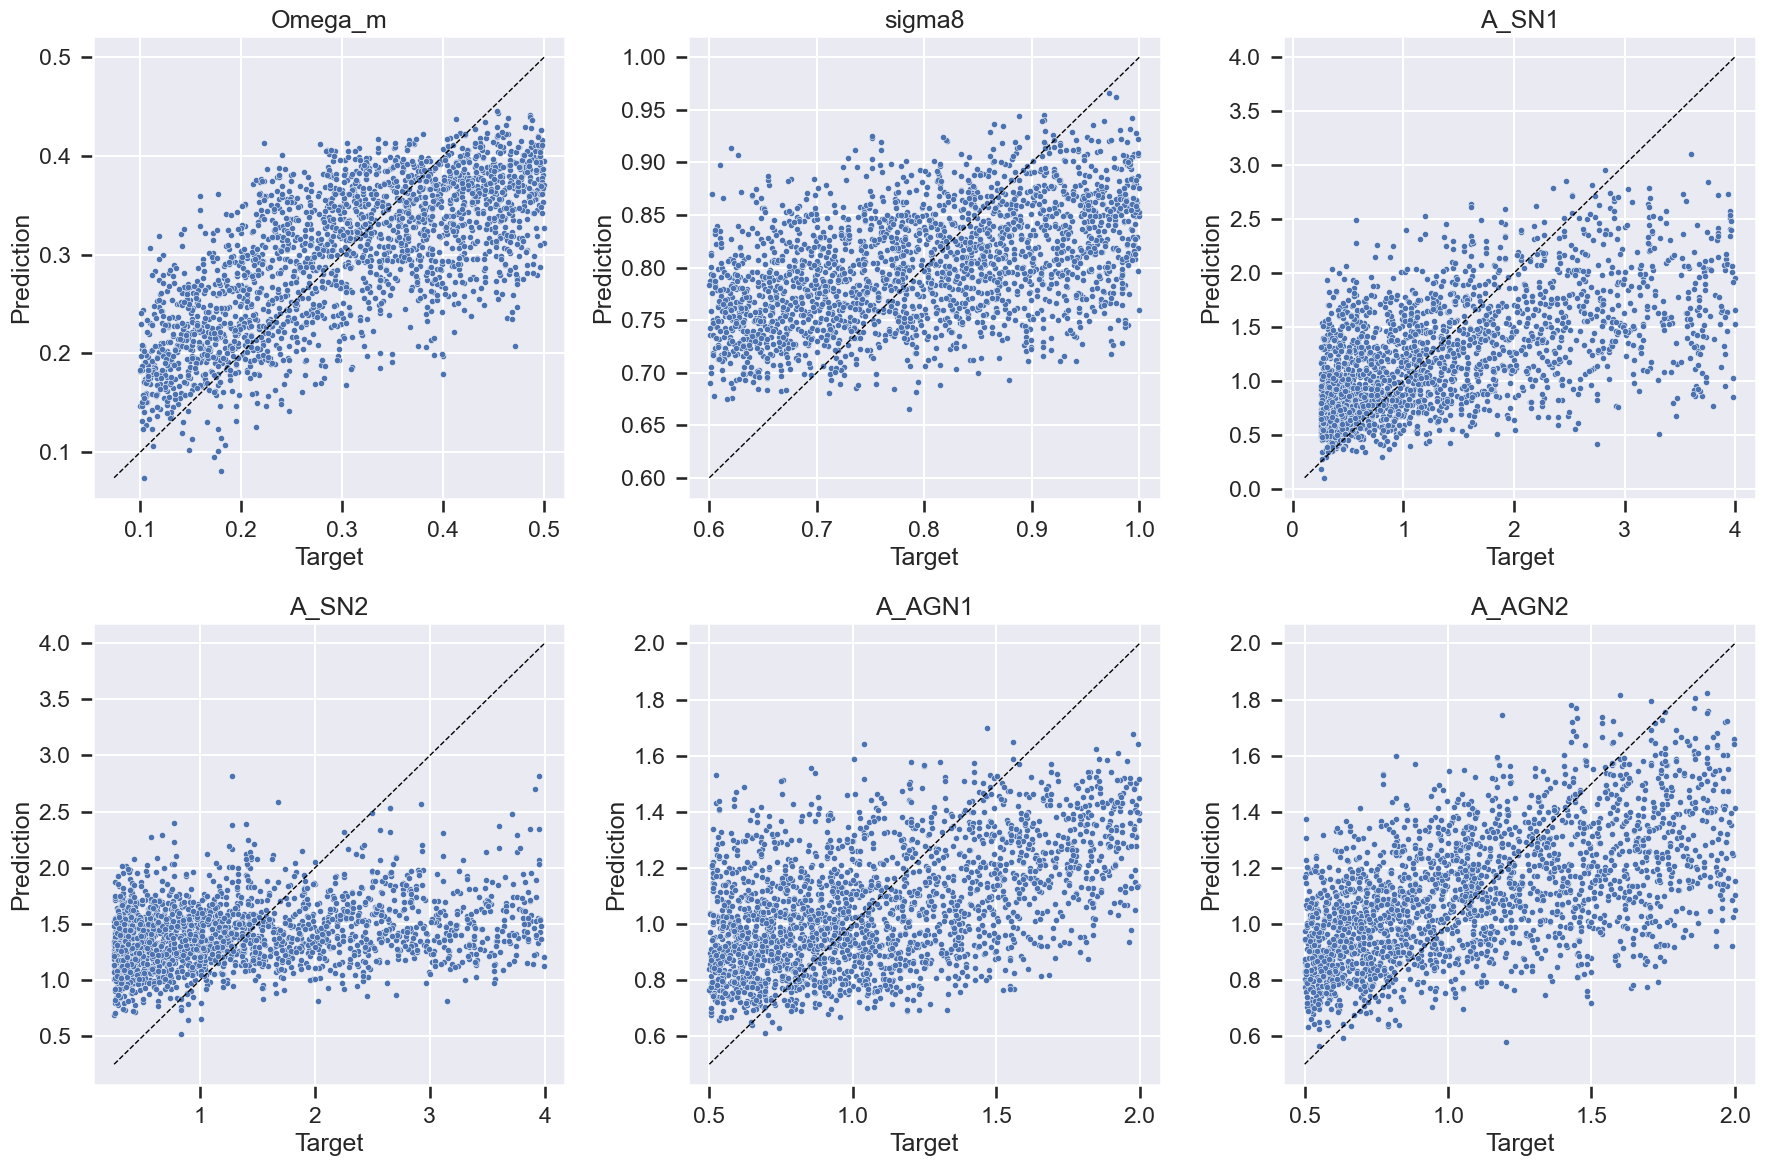

In [21]:
n_params = len(parameter_names)
n_cols = min(3, n_params)
n_rows = (n_params + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows), squeeze=False)

for ax, name in zip(axes.flatten(), parameter_names):
    target = df[f"target_{name}"]
    pred = df[f"pred_{name}"]
    sns.scatterplot(x=target, y=pred, ax=ax, s=20)
    min_val = min(target.min(), pred.min())
    max_val = max(target.max(), pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], "--", color="black", linewidth=1)
    ax.set_title(name)
    ax.set_xlabel("Target")
    ax.set_ylabel("Prediction")

# Hide unused axes if parameter count is not a multiple of n_cols
for ax in axes.flatten()[n_params:]:
    ax.axis("off")

plt.tight_layout()
plt.show()